In [1]:
#Project for COMP30920-Software & Data Project-2019/20 Spring
#By Jiwei Zhang
#2020/07/01

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [3]:
#extra for graph on world map(not finished)
#get the locations of countries as [Name, Lat, Long]
def create_locations_dataframe( url ):
    raw = pd.read_csv( url )
    tmp = raw[["Country/Region", "Lat", "Long"]]
    lc = tmp.groupby( ["Country/Region"] ).mean()
    return lc

In [4]:
#week 2
#create cleaned dataframe with countries as columns and date as index
def create_clean_dataframe( url ):
    raw = pd.read_csv( url )
    tmp = raw.drop( columns = ["Province/State", "Lat", "Long"] )
    cleaned = tmp.groupby( ["Country/Region"] ).sum()
    cleaned_trans = cleaned.T
    index = pd.to_datetime( cleaned_trans.index )
    cleaned_trans.index = index.strftime("%d %B")
    return cleaned_trans

In [5]:
#week 2
#URL defined
url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
url_recovered = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
#confirmed, deaths, recovered defined
confirmed = create_clean_dataframe( url_confirmed )
deaths = create_clean_dataframe( url_deaths )
recovered = create_clean_dataframe( url_recovered )
#location info defined
location = create_locations_dataframe( url_confirmed )

In [6]:
#week 3 helper (data management)
#get worldwide total cases number
def get_worldwide_data( df ):
    return df.sum( axis = 1 )

In [7]:
#week 3 variables define:
confirmed_worldwide = get_worldwide_data( confirmed )
deaths_worldwide = get_worldwide_data( deaths )
recovered_worldwide = get_worldwide_data( recovered )

In [8]:
#week 3 graph: world-wide data summary:
def generate_world_wide_graph( title, df ):
    #initialize figure
    sns.set()
    fig, ax=plt.subplots( figsize=(25, 10) )
    #set title
    plt.title( title, fontsize = 20 )
    plt.ylabel( "Number of Cases(log) by Time", fontsize = 15 )
    plt.xlabel( "Time by Date", fontsize = 15 )
    #set x axis
    x_range = np.arange( 0, len(df), 3)
    plt.xticks( x_range, rotation = 60 )
    plt.xlim( 0 )
    #set y axis
    ax.set_yscale('log')
    ax.yaxis.set_major_locator( ticker.LogLocator( base = 10, subs = [1, 2, 5] ) )
    ax.yaxis.set_major_formatter( ticker.FormatStrFormatter('%d') )
    #line plot
    ax.plot( df, marker='o' )
    #save fig into a file
    plt.savefig( title+'.png' )

In [9]:
#week 3 graph: world-wide rolling average:
def generate_world_wide_average_graph( title, df ):
    #management on df to get increased cases
    df = df.diff()
    #initialize figure
    sns.set()
    fig, ax=plt.subplots( figsize=(25, 10) )
    #set title
    plt.title( title, fontsize = 20 )
    plt.ylabel( "Number of New Cases", fontsize = 15 )
    plt.xlabel( "Date", fontsize = 15 )
    #set x axis
    x_range = np.arange( 0, len(df), 3)
    plt.xticks( x_range, rotation = 60 )
    plt.xlim( 0 )
    #bar graph added
    ax.bar( df.index, df, width=0.5, align='edge' )
    #average on 3 days
    rolling_windows = df.rolling(3, min_periods=1)
    rolling_mean = rolling_windows.mean()
    #line plot
    ax.plot( rolling_mean )
    #save fig into a file
    plt.savefig( title+'.png' )

In [10]:
#week 4 helper (data management)
#get the dataframe, which shows the data by days since the 100th cases, from cleaned dataframe
def get_data_by_days_since( df, min_cases ):
    # the data not satisfied will be filled as NaN
    tmp = df.copy()
    tmp = tmp.reset_index( drop=True )
    tmp = tmp[ tmp >= min_cases ]
    return tmp

In [11]:
#week 4: variable define
confirmed_since_hundred = get_data_by_days_since( confirmed, 100 )
deaths_since_ten = get_data_by_days_since( deaths, 10 )
recovered_since_ten = get_data_by_days_since( recovered, 10 )

In [12]:
#week 4 helper: to get locations of annotations
def get_points( ymin, ymax, xmin, xmax ):
    #how many day are needed to reach ymax from ymin
    min_day = math.log( ymax/ymin, 2 )
    x_base = math.ceil( 0.75 * min_day )
    y_base = ymin * pow( 2, x_base )
    #point 1 for double every day
    p1 = ( x_base - 1.5, y_base )
    #point 2 for double every 2 days 
    p2 = ( 2*x_base - 1.5, y_base)
    #point 3 for double every 5 days
    p3 = ( 5*x_base - 1.5, y_base )
    #point 4 for double every week
    p4 = ( 7*x_base - 1.5, y_base )
    #point 5 for double every 2 weeks
    p5 = ( 14*x_base - 1.5, y_base )
    return [ p1, p2, p3, p4, p5 ]

In [13]:
#week 4 helper: to trans radian to degree for rotation
def degree(x):
    pi=math.pi
    degree=(x*180)/pi
    return degree

In [14]:
#week 4 location: to get rotations for annotations
def get_rotation( ymin, ymax, xmin, xmax, yfig, xfig ):
    #how many day are needed to reach ymax from ymin
    min_day = math.log( ymax/ymin, 2 )
    x_base = math.ceil( min_day )
    x_location = x_base * ( 25 / 200 )
    y_base = ymin * pow( 2, x_base )
    y_location = math.log10( y_base/ymin ) * ( 10 / math.log10( ymax/ymin ) )
    #Rotation 1 for double every day
    r1 = degree( math.atan( y_location / x_location ) )
    #Rotation 2 for double every 2 days 
    r2 = degree( math.atan( y_location / 2 / x_location) )
    #Rotation 3 for double every 5 days
    r3 = degree( math.atan( y_location / 5 / x_location ) )
    #Rotation 4 for double every week
    r4 = degree( math.atan( y_location / 7 / x_location ) )
    #Rotation 5 for double every 2 weeks
    r5 = degree( math.atan( y_location / 14 / x_location ) )
    return [ r1, r2, r3, r4, r5 ]

In [15]:
#week 4 graph
def generate_total_number_graph_for_each_country( title, df, ymin, ymax, xmin, xmax ):
    #initialize figure
    sns.set()
    fig, ax=plt.subplots( figsize=(25, 10) )
    #split the dataframe into 2 parts
    target = [ 'United Kingdom', 'Ireland' ]
    df_target = df[ target ]
    df_rest = df.drop( columns = target )
    #create the straight lines showing incresing speed
    x = np.arange( 0, 300, 1)
    #get location and rotation for annotation
    points = get_points( ymin, ymax, xmin, xmax )
    rotation = get_rotation( ymin, ymax, xmin, xmax, 10, 25 ) 
    #annotation:
    #double every day
    plt.plot( x, ymin*pow(2,x/1), color='grey', dashes=[10,2] )
    plt.annotate( s='1 DAY DOUBLING', xy=points[0], fontsize=13 ).set_rotation( rotation[0] )
    #double every 2 days
    plt.plot( x, ymin*pow(2,x/2), color='grey', dashes=[10,2])
    plt.annotate( s='2 DAYS DOUBLING', xy=points[1], fontsize=13 ).set_rotation( rotation[1] )
    #double every 5 days
    plt.plot( x, ymin*pow(2,x/5), color='grey', dashes=[10,2] )
    plt.annotate( s='5 DAYS DOUBLING', xy=points[2], fontsize=13 ).set_rotation( rotation[2] )
    #double every week
    plt.plot( x, ymin*pow(2,x/7), color='grey', dashes=[10,2] )
    plt.annotate( s='1 WEEK DOUBLING', xy=points[3], fontsize=13 ).set_rotation( rotation[3] )
    #double every 2 week
    plt.plot( x, ymin*pow(2,x/14), color='grey', dashes=[10,2] )
    plt.annotate( s='2 WEEKS DOUBLING', xy=points[4], fontsize=13 ).set_rotation( rotation[4] )
    #using loops to generate line plot
    for column in df_rest.columns:
        tmp = df_rest[ column ]
        tmp = tmp.dropna( axis = 0 )
        tmp = tmp.reset_index( drop=True )
        tmp = tmp.astype( int )
        ax = sns.lineplot( linewidth=0.5, color='xkcd:light grey', data = tmp)
    for column in df_target.columns:
        tmp = df_target[ column ]
        tmp = tmp.dropna( axis = 0 )
        tmp = tmp.reset_index( drop=True )
        tmp = tmp.astype( int )
        ax = sns.lineplot( marker='o', markersize=5, data = tmp )
        #add the annotation
        point_x = tmp.index.stop
        point_y = tmp.tail( 1 ).values[ 0 ]
        plt.annotate( s=column, xy=(point_x, point_y), fontsize=15 )
    #set title
    ax.set_xlabel( "Number of days", fontsize = 15 )
    ax.set_ylabel( "Number of cases", fontsize = 15 )
    ax.set_title( title, fontsize = 20 )
    #set origin
    ax.set_ylim( ymin, ymax)
    ax.set_xlim( xmin, xmax )
    #set y axis
    ax.set_yscale('log')
    ax.yaxis.set_major_locator( ticker.LogLocator( base = 10, subs = [1, 2, 5] ) )
    ax.yaxis.set_major_formatter( ticker.FormatStrFormatter('%d') )
    #save fig into a file
    plt.savefig( title+'.png' )

In [16]:
#week 5 graph
def generate_increase_graph_for_each_country( title, df, xmin, xmax, ymax ):
    #initialize figure
    sns.set()
    fig, ax=plt.subplots( figsize=(25, 10) )
    #split the dataframe into 2 parts
    target = [ 'United Kingdom', 'Ireland' ]
    df_target = df[ target ]
    df_rest = df.drop( columns = target )
    #using loops to generate line plot
    for column in df_rest.columns:
        #get the series that represent the data on x axis
        x = df_rest[ column ]
        x = x.drop_duplicates( keep='first' )
        x = x.dropna( axis = 0 )
        x = x.reset_index( drop=True )
        x = x.astype( int )
        #**************************************************************
        #Explian why I sort the data here:
        #to solve the problem caused by negative increasing value
        #if I can sort the value, the min and max of a specific period
        #won't change. The min is the left most point and the max is the
        #right most. But only the middle part, which contains the error,
        #will be changed to match the graph. Which is very similar to 
        #replace them by the average from between min and max
        #**************************************************************
        #For example, the data is [..., 900, 1000, 920, 1030, 1100, ...]
        #The sorted one will be 900, 920, 1000, 1030, 1100
        #The average one is 900, 950, 1000, 1050, 1100, which is similar
        #**************************************************************
        x = x.sort_values()
        #get the series that represent the data on y axis
        y = x.diff()
        #draw the line
        ax = sns.lineplot( x=x, y=y, linewidth=0.5, color='xkcd:light grey')
    for column in df_target.columns:
        x = df_target[ column ]
        x = x.drop_duplicates( keep='first' )
        x = x.dropna( axis = 0 )
        x = x.reset_index( drop=True )
        x = x.astype( int )
        x = x.sort_values()
        #get the series that represent the data on y axis
        y = x.diff()
        #draw the line
        ax = sns.lineplot( x=x, y=y, marker='o', markersize=5 )
        #add the annotation
        point_x = x.tail( 1 ).values[ 0 ]
        point_y = y.tail( 1 ).values[ 0 ]
        if point_y == 0:
            point_y = 1
        plt.annotate( s=column, xy=(point_x, point_y), fontsize=15 )
    #set title
    ax.set_title( title, fontsize = 20 )
    ax.set_xlabel( "Total Cases(log) by Time", fontsize = 15 )
    ax.set_ylabel( "New Daily Cases(log) by Time", fontsize = 15 )
    #set x axis
    ax.set_xscale('log')
    ax.xaxis.set_major_locator( ticker.LogLocator( base = 10, subs = [1, 2, 5] ) )
    ax.xaxis.set_major_formatter( ticker.FormatStrFormatter('%d') )
    #set y axis
    ax.set_yscale('log')
    ax.yaxis.set_major_locator( ticker.LogLocator( base = 10, subs = [1, 2, 5] ) )
    ax.yaxis.set_major_formatter( ticker.FormatStrFormatter('%d') )
    #set origin
    ax.set_ylim( 1, ymax )
    ax.set_xlim( xmin, xmax )
    #add the annotation
    
    #save fig into a file
    plt.savefig( title+'.png' )

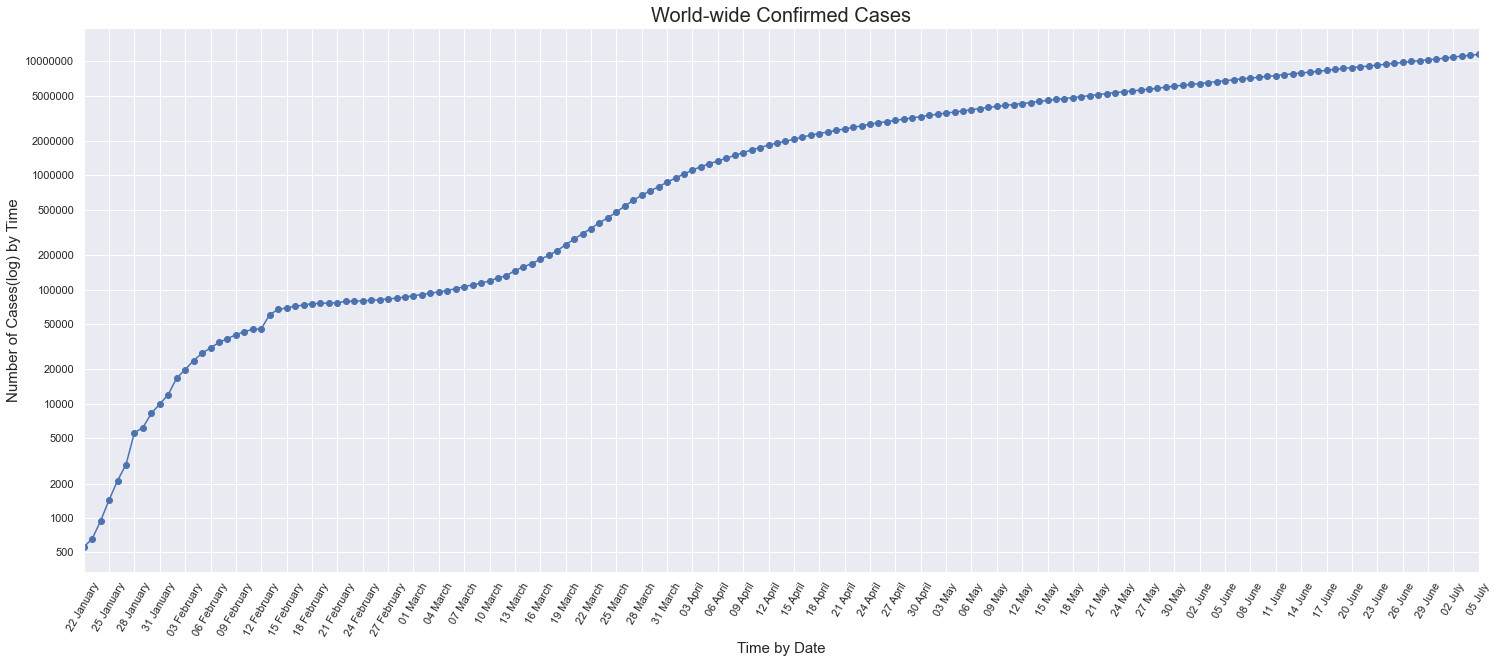

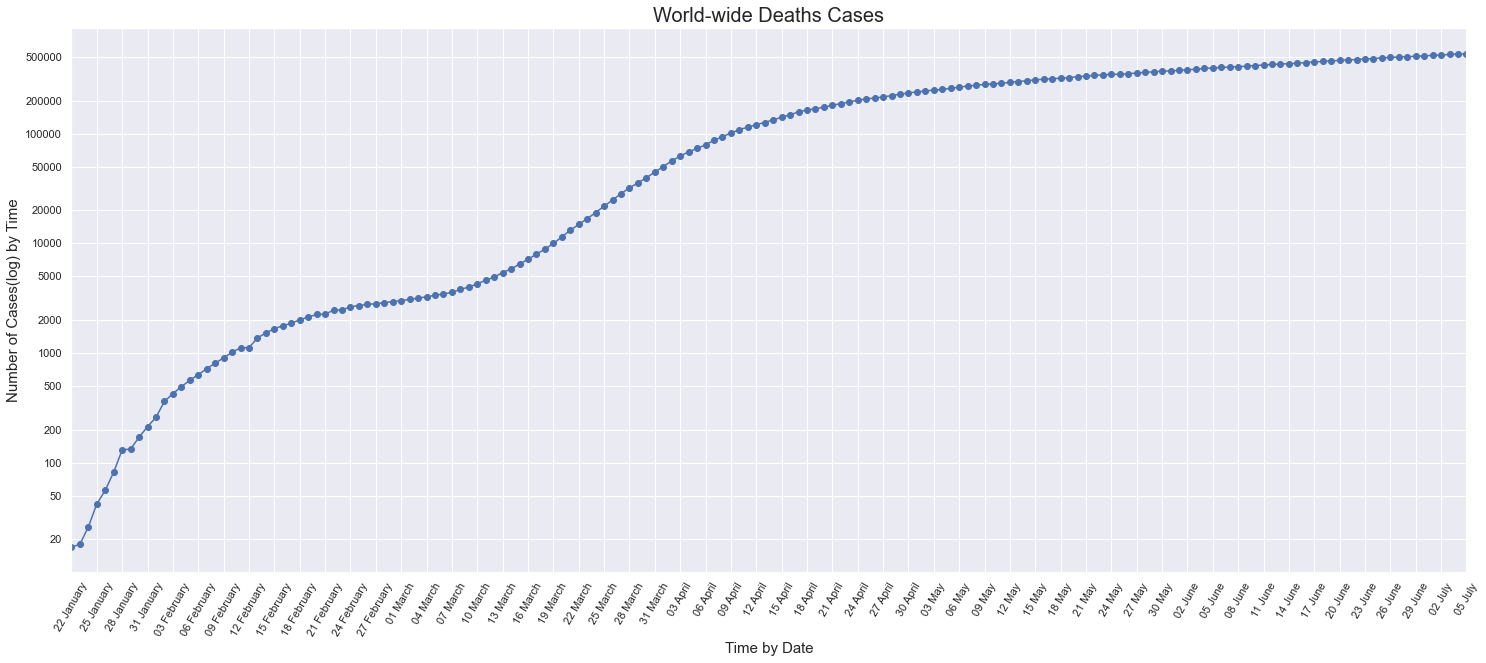

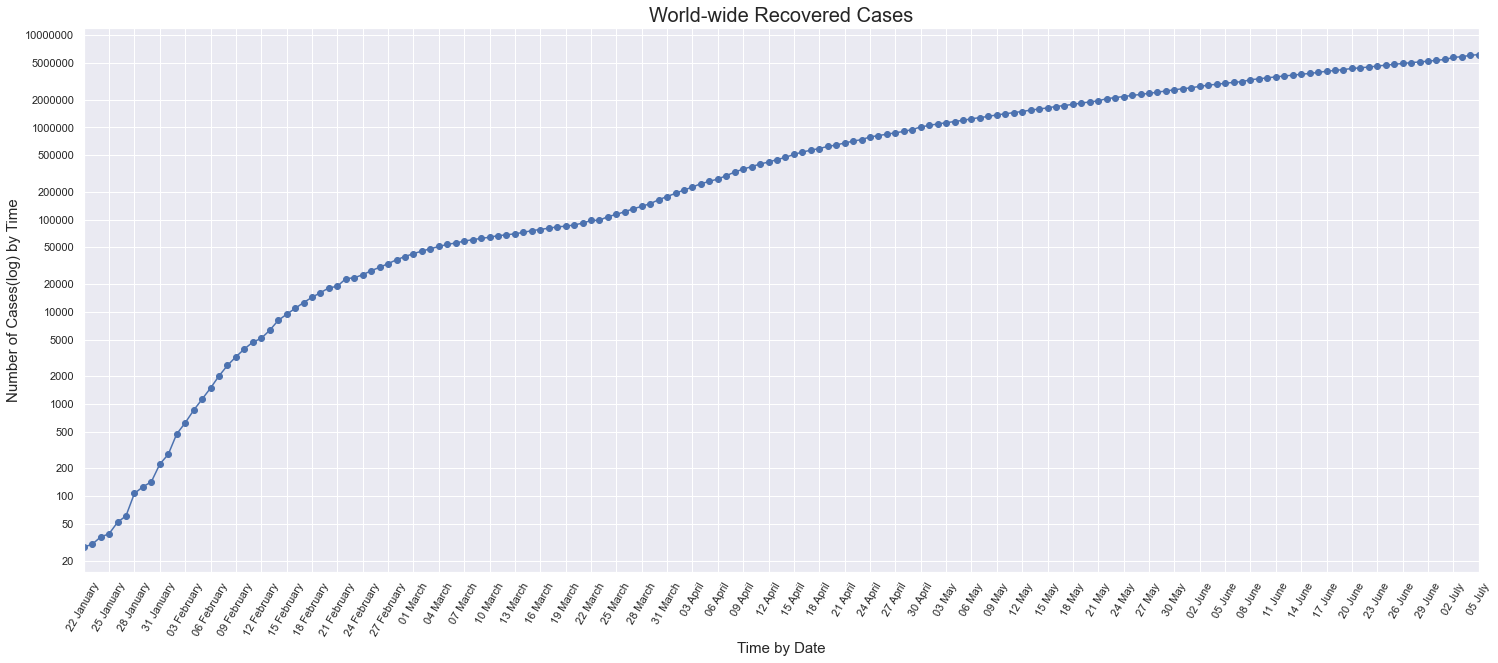

In [17]:
#week 3 graph 1 print
generate_world_wide_graph( "World-wide Confirmed Cases", confirmed_worldwide )
generate_world_wide_graph( "World-wide Deaths Cases", deaths_worldwide )
generate_world_wide_graph( "World-wide Recovered Cases", recovered_worldwide )

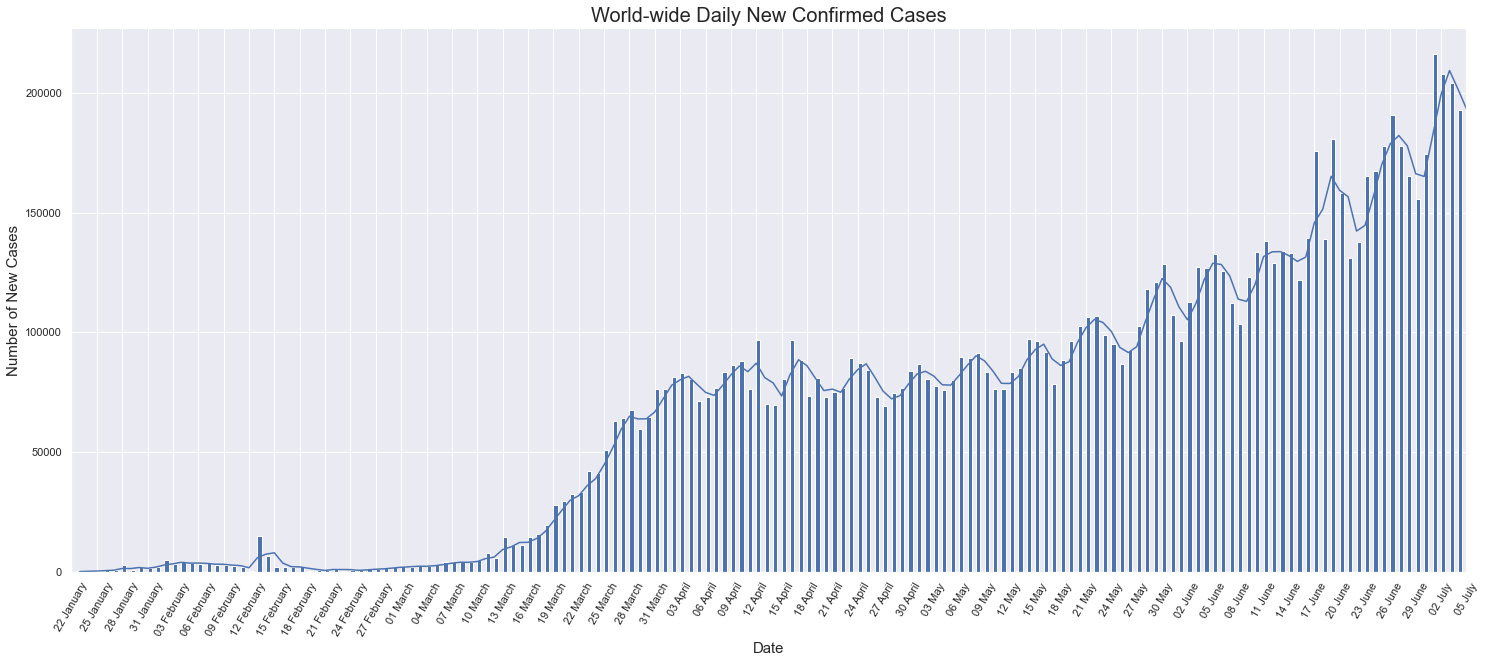

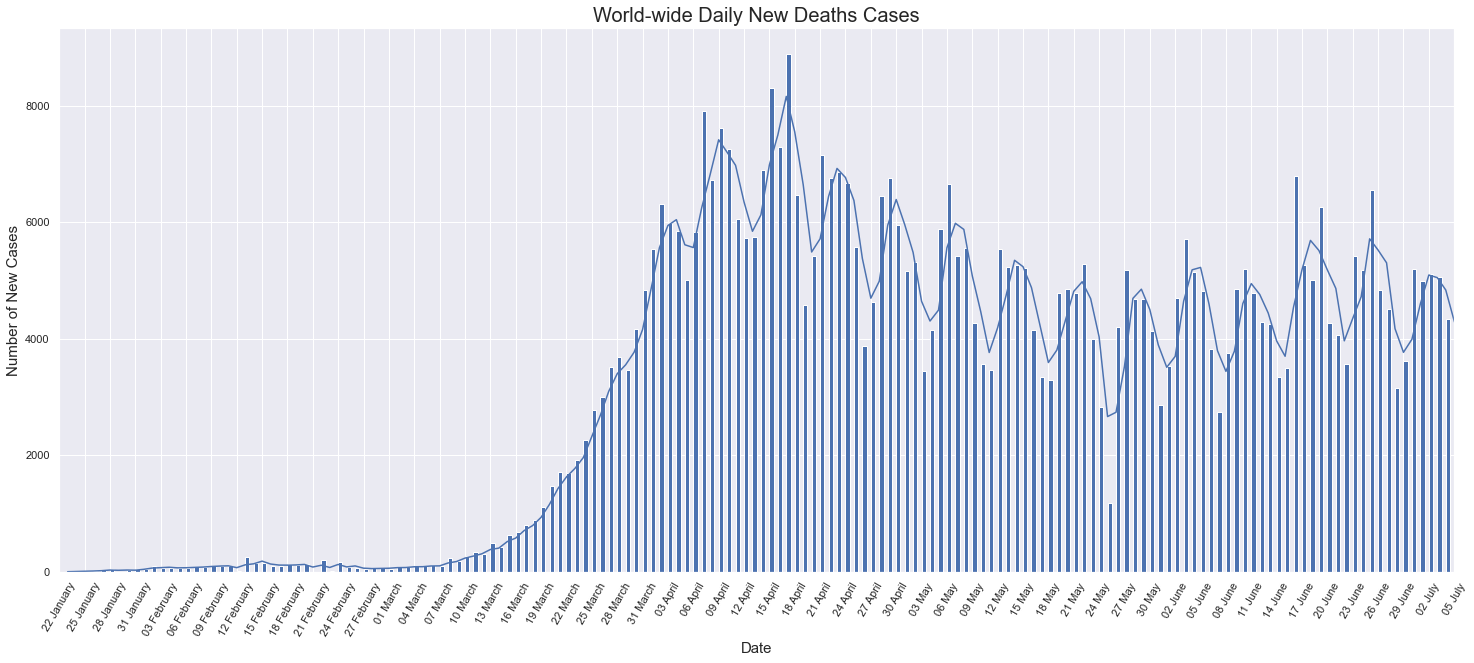

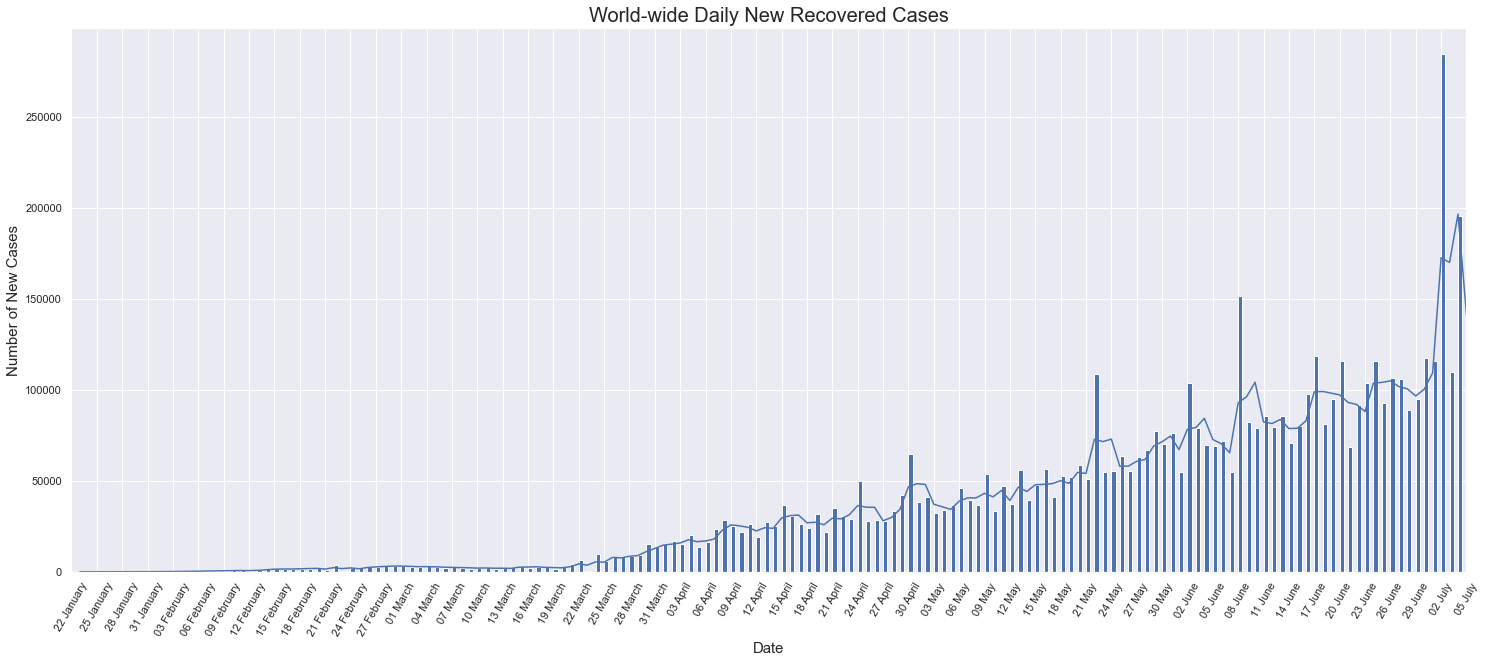

In [18]:
#week 3 graph 2 print
generate_world_wide_average_graph( "World-wide Daily New Confirmed Cases", confirmed_worldwide )
generate_world_wide_average_graph( "World-wide Daily New Deaths Cases", deaths_worldwide )
generate_world_wide_average_graph( "World-wide Daily New Recovered Cases", recovered_worldwide )

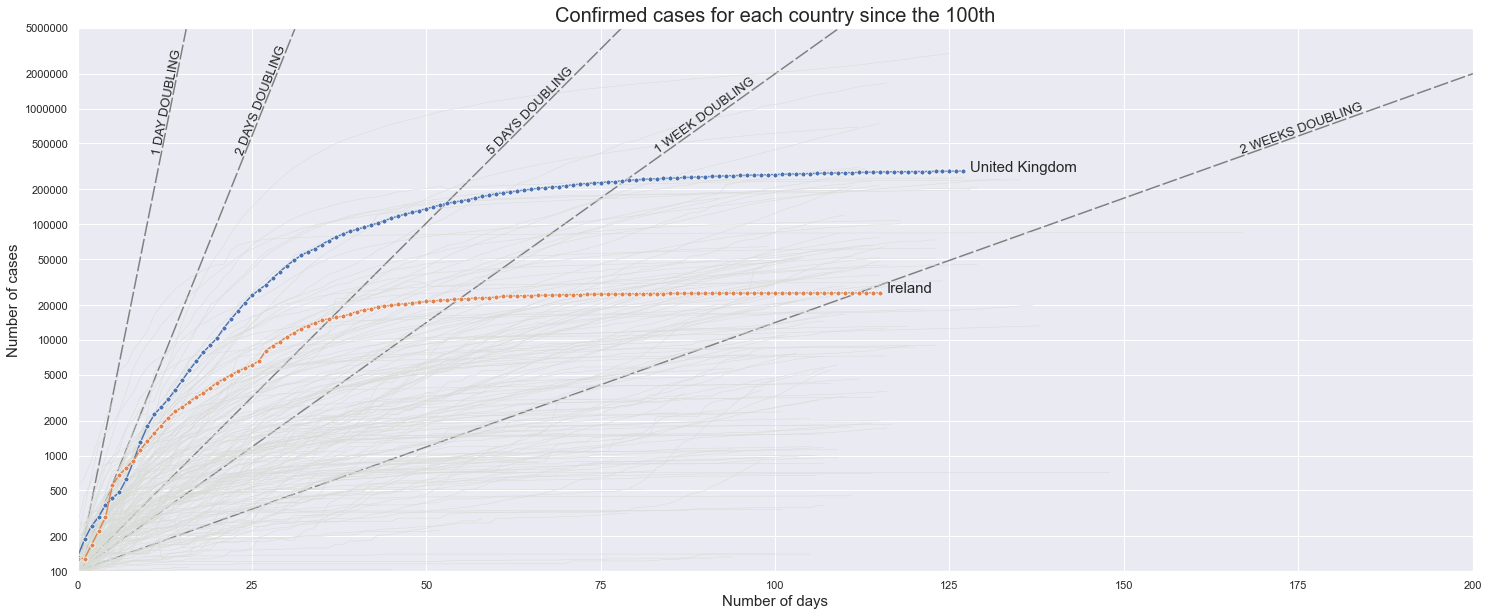

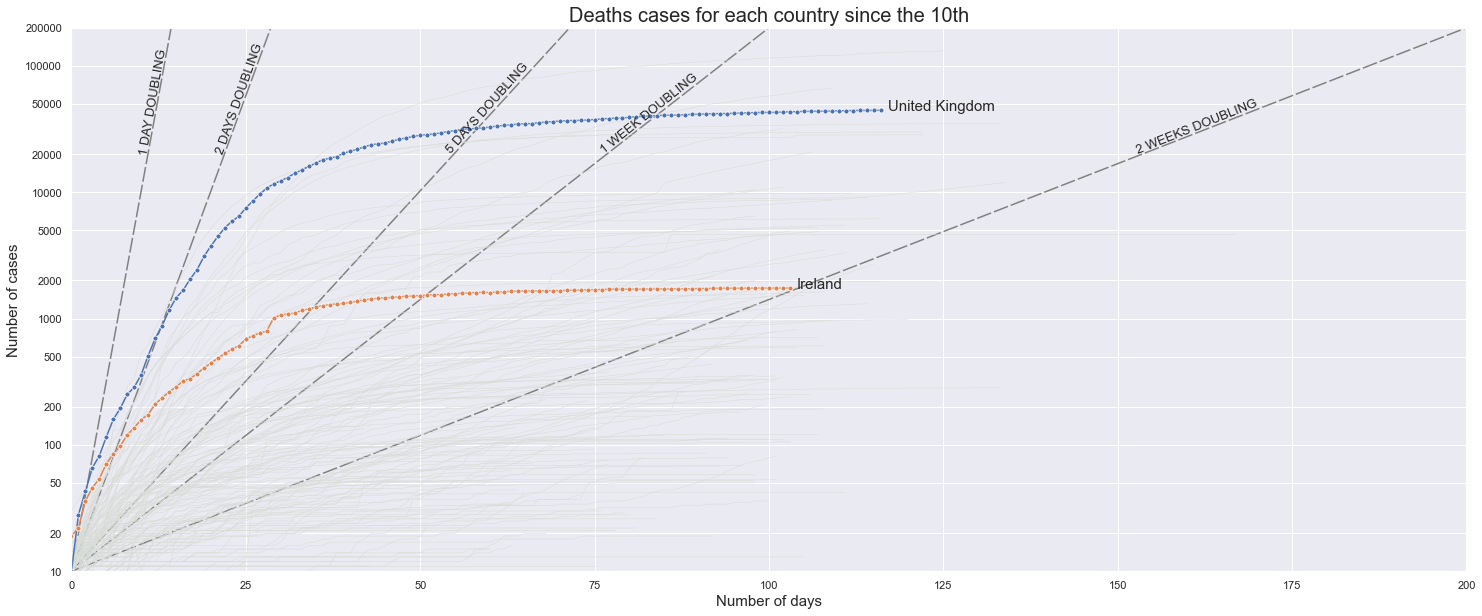

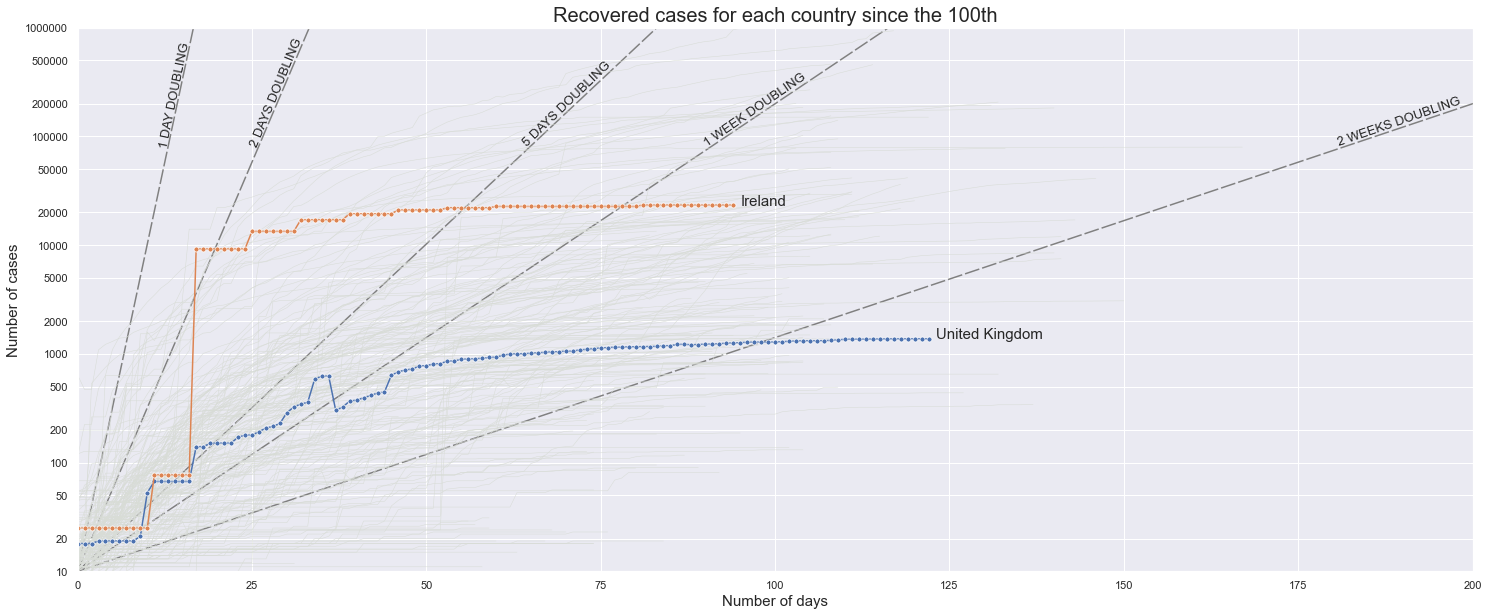

In [19]:
#week 4 graph print
generate_total_number_graph_for_each_country( "Confirmed cases for each country since the 100th", confirmed_since_hundred, 100, 5000000, 0, 200 )
generate_total_number_graph_for_each_country( "Deaths cases for each country since the 10th", deaths_since_ten, 10, 200000, 0, 200 )
generate_total_number_graph_for_each_country( "Recovered cases for each country since the 100th", recovered_since_ten, 10, 1000000, 0, 200 )

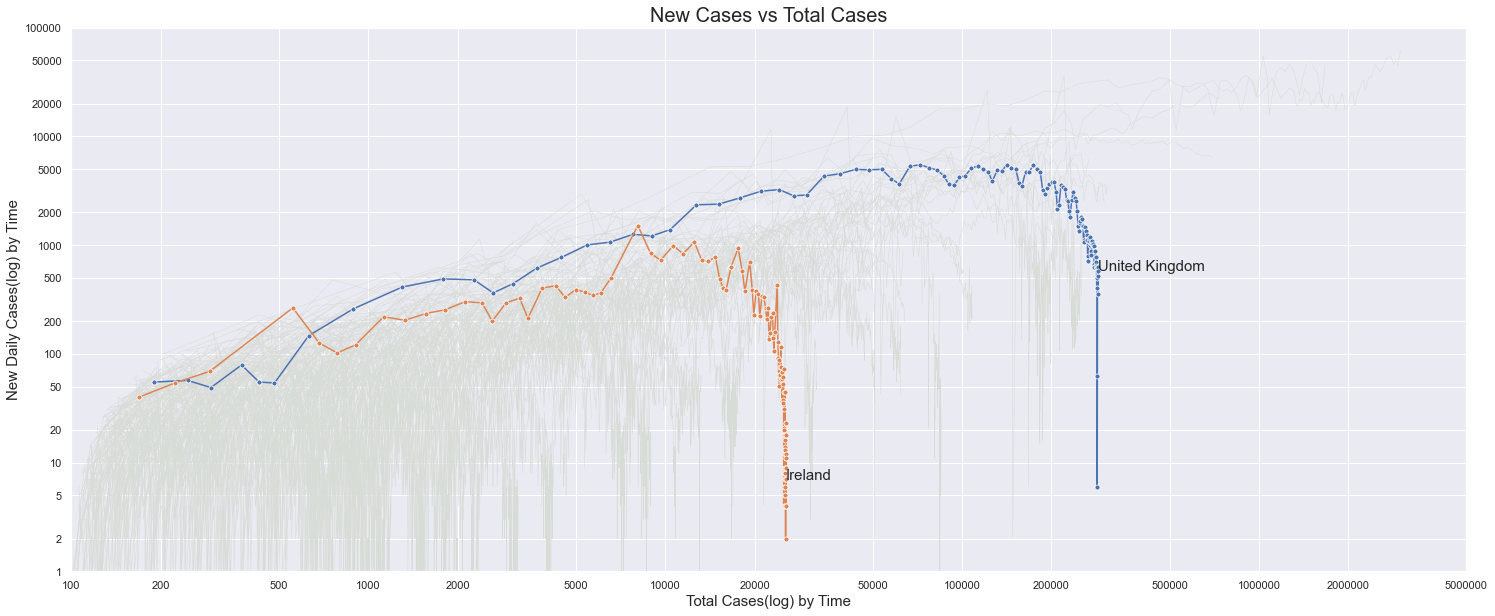

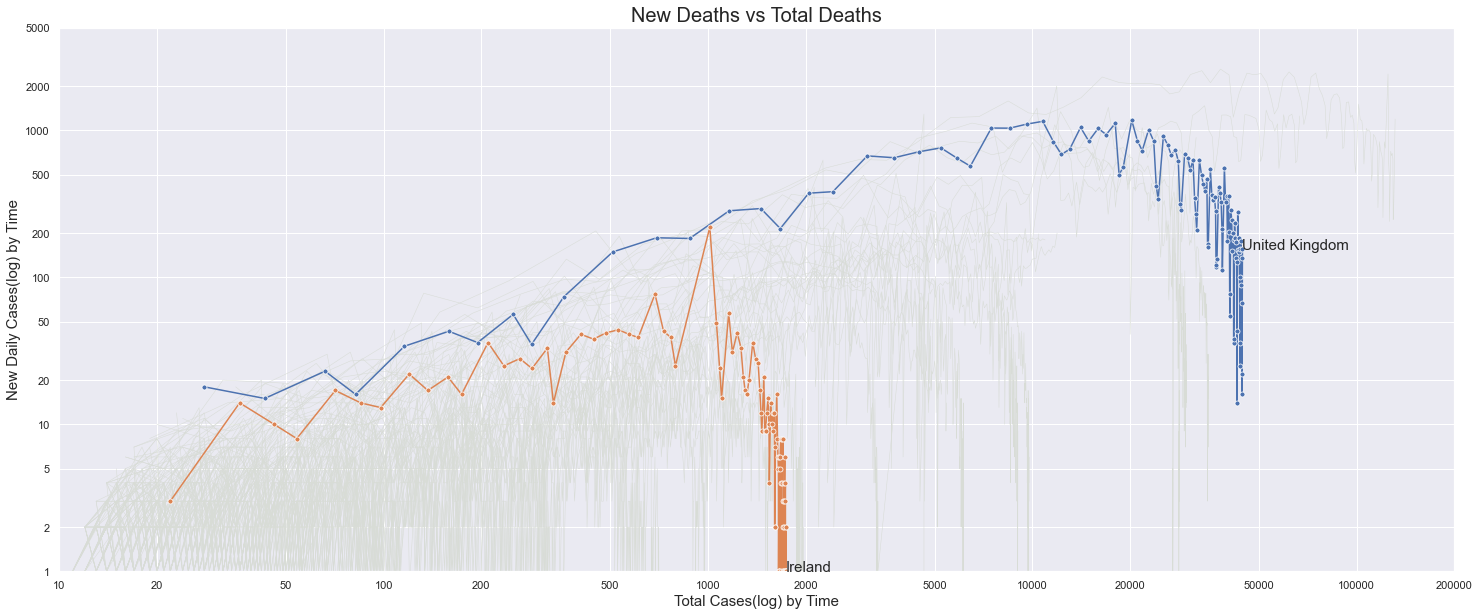

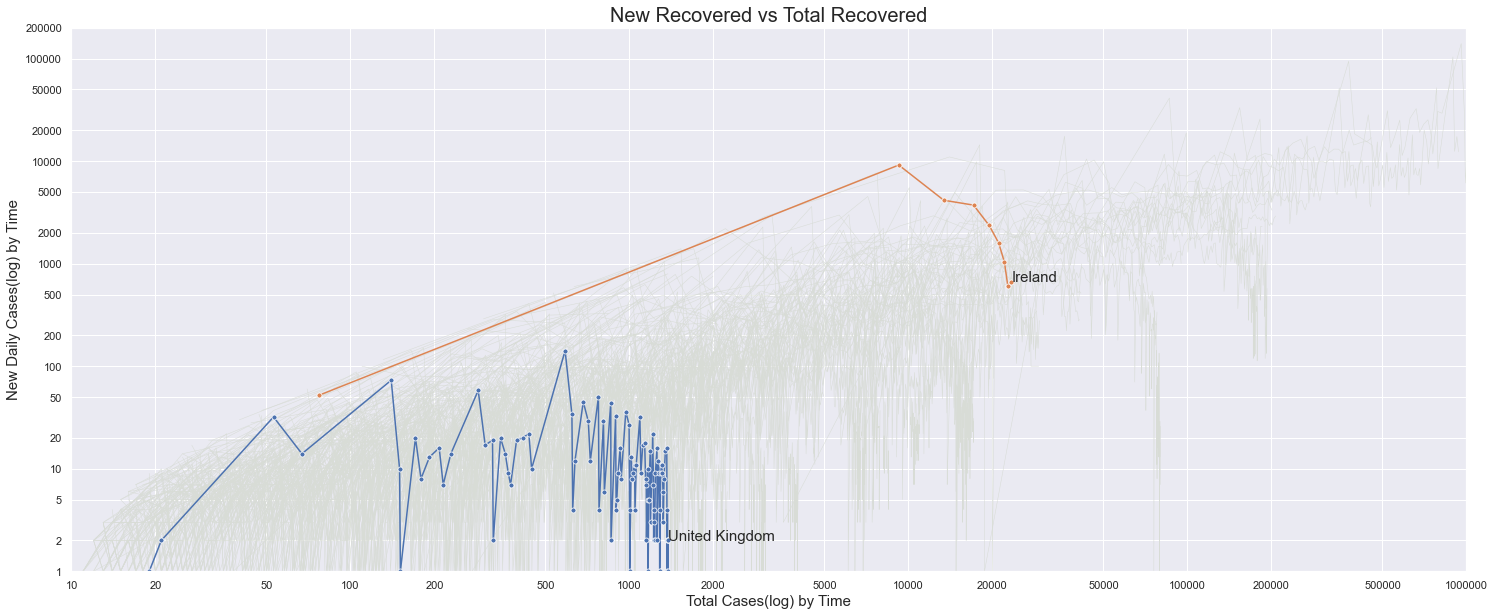

In [20]:
#week 5 graph print
generate_increase_graph_for_each_country( "New Cases vs Total Cases", confirmed_since_hundred, 100, 5000000, 100000 )
generate_increase_graph_for_each_country( "New Deaths vs Total Deaths", deaths_since_ten, 10, 200000, 5000 )
generate_increase_graph_for_each_country( "New Recovered vs Total Recovered", recovered_since_ten, 10, 1000000, 200000 )